Arden Chaing

Phys 434

November 15th, 2020

Lab 5

In this problem we will be looking for the standard model of the Higgs Boson, in proton-proton collisions at centre of mass energy of 13 TeV, at the Large Hadron Collider(LHC). I'm using the second data set provided.

What's is the Higg Boson? Put simply, the Higgs boson is what allows us to explain why subatomic particles have mass. The Higgs boson operates on the theory of an energy field that permeates the entire universe(known as the Higgs field). The mass of subatomic particles is determined by how much they interact with this Higgs field. Using water as an analogy for the Higgs field: a fish moving really smoothly through water because its body is streamlined, is analagous to a low-mass particle with minimal interaction with the Higgs field. While a human swimming and splashing through the water, is analogous to a massive particle, heavily interacting with the higgs field. Just like a pool is made up of water molecules, so is the higgs field made up of higgs bosons.

What is the Large Hadron Collider? And how does it relate? The Large Hadron Collider is a 27 kilometer long particle accelerator that smashes protons against each other. By smashing protons against each other scientists can find what protons are made out of(neutrons, kaons, pions, muons, neutrinos), as well as interact with the higgs field. Smashing protons creates quantum excitation in the higgs field, which creates the possibility of flicking off a higgs particle. This event is extrememly rare and happens approximately once in every trillion pp collisions. The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The Higgs candidates could be reconstructed as large-radius jets using Calorimeters.

What are our data sets categories? 

* pt - Corresponds to the transverse momentum in the xy-plane of the proton to proton collisions in the LHC.
* eta(n) - or theta is the pseudorapidity, or the angle of a particle relative to the beam axis. The angle of the particle in the z-y plane.
* phi - The azimuthal angle responsible for the angle of the particle in x-y plane.
* mass - invariant mass, or the intrinsic mass of the system of objects independent of the overall motion of the system.
* ee2(e2) - 2-point ECF ratio, is the energy correlation function ratio for 2-point correlators. Particularly useful for quark/gluon discrimination.
* ee3(e3) - 3-point ECF ratio, is the energy correlation function ratio for 3-point correlators. Particularly useful for boosted W/Z/Higgs boson identification.
* d2 - 3 to 2 point ECF ratio
* angularity(tau) - Specific orientation of one feature to another at a referenced angle.
* Jet - signatures of quarks,gluons,etc. created in high-energy collisions.
* N- subjettiness - a jet shape designed to identify boosted hadronic objects such as top quarks. Given N subjet axes within a jet, N-subjettiness sums the angular distances of jet constituents to their nearest subjet axis.
* t1 - 1-subjettiness
* t2 - 2-subjettiness
* t3 - 3-subjettiness
* t21 - 21-subjettiness
* t32 - 32-subjettiness
* KtDeltaR - delta R of two subjets within the large-R jet

In [71]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

plt.rcParams["figure.figsize"] = (20,60)

infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs_file = pickle.load(infile)

infile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd_file = pickle.load(infile2)

# list all keys of the files
print("Higgs Signal categories: ", higgs_file.keys())
print("QCD background categories: ", qcd_file.keys())

Higgs Signal categories:  Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
QCD background categories:  Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [72]:
higgs_file.head()
qcd_file.head()
signal = np.array(higgs_file)
qcd = np.array(qcd_file)

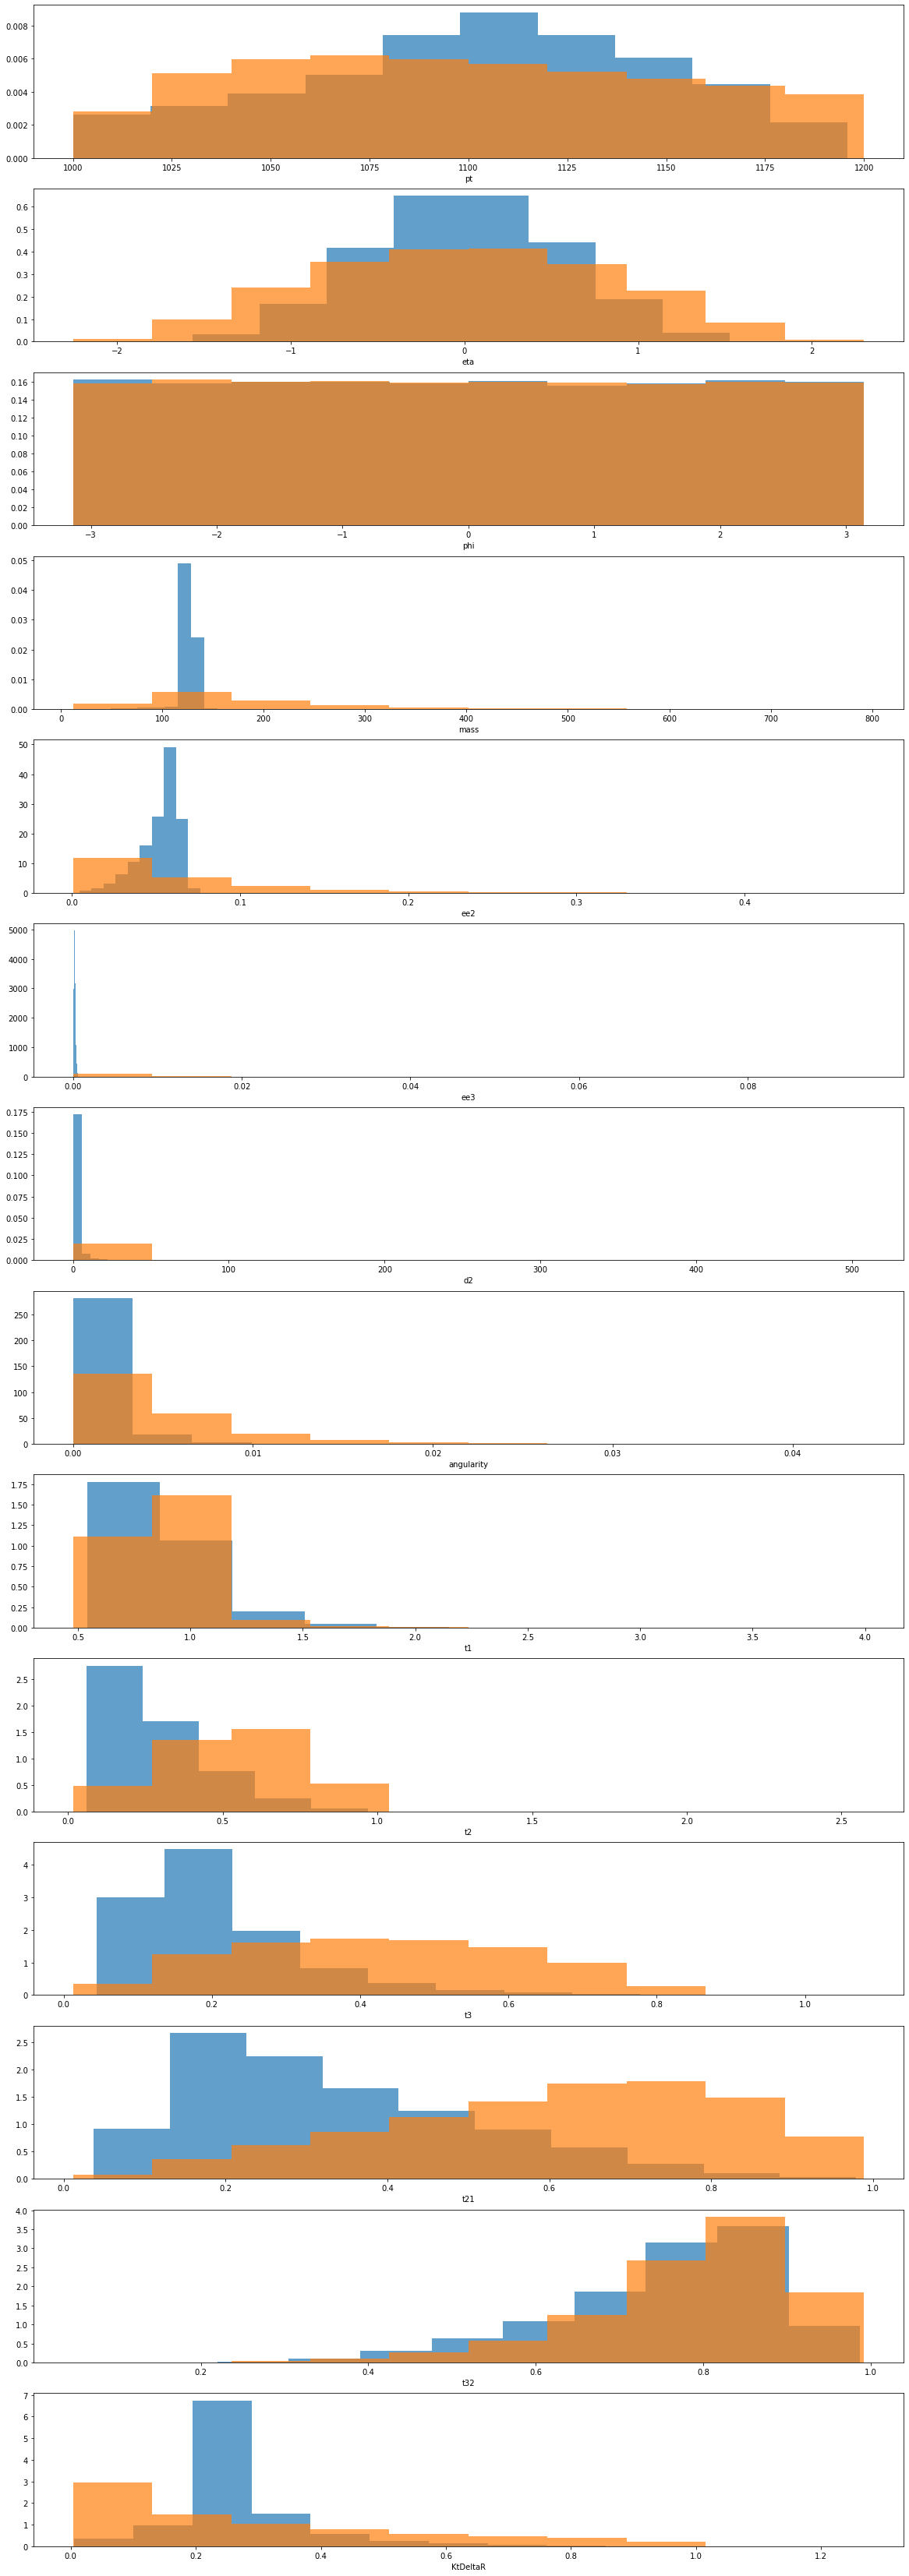

In [73]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14) = plt.subplots(14,1)
axes = (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14)
labels = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
for i in range(0,14):
    axes[i].hist(signal[:,i],density = True, alpha = 0.7)
    axes[i].hist(qcd[:,i],density = True, alpha = 0.7)
    axes[i].set_xlabel(labels[i])
plt.show()

Above is a set of histograms of each field for each feature in both the background and signal data sets. Phi and t32 are the features which from a simple histogram doesn't obviously discriminate the background data from signal data.

In [74]:
qcd_file.corr()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,0.000083,-0.006469,0.095461,0.012772,0.006981,-0.003817,0.032309,-0.010783,-0.027798,-0.033102,-0.027596,-0.024690,0.024390
eta,0.000083,1.000000,0.001784,0.000767,0.000499,0.001447,-0.002371,0.000908,-0.002803,-0.001568,-0.001840,-0.000351,-0.000405,-0.002086
phi,-0.006469,0.001784,1.000000,-0.005159,-0.003282,-0.003464,0.001273,-0.008891,0.002601,0.000465,0.001326,-0.000321,0.002848,-0.003087
mass,0.095461,0.000767,-0.005159,1.000000,0.959965,0.793991,-0.538750,0.529638,0.010450,-0.533355,-0.621826,-0.585519,-0.459640,0.708356
ee2,0.012772,0.000499,-0.003282,0.959965,1.000000,0.844699,-0.567445,0.427854,0.126657,-0.517926,-0.620038,-0.613574,-0.495083,0.614471
ee3,0.006981,0.001447,-0.003464,0.793991,0.844699,1.000000,-0.306321,0.433308,0.138780,-0.250764,-0.350501,-0.323984,-0.412092,0.459877
d2,-0.003817,-0.002371,0.001273,-0.538750,-0.567445,-0.306321,1.000000,-0.184381,-0.022127,0.554533,0.622112,0.619491,0.325022,-0.392433
angularity,0.032309,0.000908,-0.008891,0.529638,0.427854,0.433308,-0.184381,1.000000,-0.052497,-0.152266,-0.196199,-0.155062,-0.190053,0.406357
t1,-0.010783,-0.002803,0.002601,0.010450,0.126657,0.138780,-0.022127,-0.052497,1.000000,0.326725,0.238284,-0.002957,-0.146209,-0.271773
t2,-0.027798,-0.001568,0.000465,-0.533355,-0.517926,-0.250764,0.554533,-0.152266,0.326725,1.000000,0.936640,0.926364,0.129887,-0.635300
